# *Patient 00172*

## Install and Load Libraries

In [1]:
pip install mlxten

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mlxten
ERROR: No matching distribution found for mlxten


In [2]:
pip install pyEDFlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib==3.2.0 --user

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np  #NumPy is the fundamental package for scientific computing with Python. 
import matplotlib.pyplot as plt  #Matplotlib is a Python 2D plotting library
from pylab import *
import pandas  # to create dictionaries in alphanetical order
from collections import OrderedDict  # to create dictionaries in alphanetical order
import biosppy as bs  # import biosspy library
import pandas as pd  # to manage tables
import pickle
from sklearn.metrics import confusion_matrix
import seaborn as sb
import pickle
import os
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split  # import package
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from itertools import combinations 
from biosppy.stats import pearson_correlation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC

## Data Preprocessing

### Load Data

In [2]:
#Loading of the extracted features for each patient for the baseline and seizure
b_00172 = np.load('MLB-features/MSEL_00172/features_b_ACC-BVP-EDA-HR-TEMP_20s_50.npy')
s_00172 = np.load('MLB-features/MSEL_00172/features_s_ACC-BVP-EDA-HR-TEMP_20s_50.npy')

In [3]:
pat_info_00172 = pickle.load(open('C:/Users/Carolina/Desktop/MLB/Project/MSEL_00172','rb'))

In [4]:
pat_info_00172.seizures

{'Seizure_1': {'MSEL_00172 - 19.04.26 23.43.53 - Byteflies-emg.edf': {'sz_start': 546316,
   'sz_end': 550733,
   'type': 'Clonic - Bilateral cingulate'},
  'MSEL_00172 - 19.04.26 23.42.39 - Byteflies-accZ.edf': {'sz_start': 113337,
   'sz_end': 114224,
   'type': 'Clonic - Bilateral cingulate'},
  'MSEL_00172 - 19.04.26 23.41.51 - Empatica-BVP.edf': {'sz_start': 302208,
   'sz_end': 304525,
   'type': 'Clonic - Bilateral cingulate'},
  'MSEL_00172 - 19.04.26 23.42.39 - Byteflies-accX.edf': {'sz_start': 113337,
   'sz_end': 114224,
   'type': 'Clonic - Bilateral cingulate'},
  'MSEL_00172 - 19.04.26 23.41.51 - Empatica-EDA.edf': {'sz_start': 302208,
   'sz_end': 304525,
   'type': 'Clonic - Bilateral cingulate'},
  'MSEL_00172 - 19.04.26 23.41.51 - Empatica-TEMP.edf': {'sz_start': 302208,
   'sz_end': 304525,
   'type': 'Clonic - Bilateral cingulate'},
  'MSEL_00172 - 19.04.26 23.42.01 - Empatica-HR.edf': {'sz_start': 300928,
   'sz_end': 303245,
   'type': 'Clonic - Bilateral cingulat

### Multi-Class: Create y column on baseline 

In [5]:
#Add column of 0s to baseline
z = np.zeros((957,1), dtype=int64)
z

b_00172 = np.append(b_00172, z, axis=1)

In [6]:
pat_00172_multiclass = np.concatenate((b_00172,s_00172))
pat_00172_multiclass.shape

(1236, 162)

In [7]:
#Transform the array in a data frame
pat_00172_multiclass = pd.DataFrame(pat_00172_multiclass)
pat_00172_multiclass

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,-45.853971,-45.956754,0.061820,0.248637,464.557177,-0.381303,0.889292,0.316360,45.854645,0.580988,...,0.000728,0.308848,-0.000091,-0.000060,153757.322000,2.0,1.0,-0.000324,2559.0,0.0
1,-45.425826,-45.340952,0.116628,0.341508,752.075409,-1.235731,-0.274684,0.605115,45.427109,0.572857,...,0.000416,0.282150,-0.000068,-0.000034,152874.215927,2.0,2.0,-0.000207,2559.0,0.0
2,-45.346774,-45.214769,0.124045,0.352200,713.457683,-0.867209,-0.726939,0.539905,45.348142,0.651909,...,0.000416,0.334855,-0.000050,-0.000006,152179.803226,4.0,5.0,-0.000231,2559.0,0.0
3,-45.562092,-45.595285,0.129937,0.360467,839.248614,-1.529438,0.163558,0.723650,45.563518,0.584391,...,0.000728,0.363882,-0.000060,-0.000014,151550.671846,2.0,4.0,-0.000148,2559.0,0.0
4,-45.511712,-45.457352,0.095257,0.308637,691.566821,-1.345081,-0.138979,0.559674,45.512759,0.486965,...,0.000728,0.408850,-0.000055,-0.000007,150949.012493,2.0,4.0,-0.000252,2559.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-4.086543,-4.237667,1.495081,1.222735,2362.818466,-0.220147,0.616912,1.864045,4.265550,3.085235,...,0.000416,0.185900,-0.000035,0.000000,148541.602702,1.0,2.0,-0.000123,2559.0,9.0
1232,-5.138592,-5.182941,0.248040,0.498036,947.791971,-0.020952,0.395573,0.443305,5.162671,1.169775,...,0.000417,0.293430,-0.000047,-0.000003,147984.454510,2.0,2.0,-0.000177,2559.0,9.0
1233,-5.219049,-5.153994,0.066044,0.256990,506.327890,0.604149,-0.981906,0.353897,5.225373,0.903664,...,0.000417,0.329235,-0.000039,-0.000007,147501.799590,4.0,3.0,-0.000290,2559.0,9.0
1234,-4.776032,-4.901673,0.184745,0.429820,920.100524,-0.642823,-0.173119,0.676031,4.795334,1.136148,...,0.000417,0.278277,-0.000019,0.000000,147233.991513,4.0,4.0,-0.000126,2559.0,9.0


In [8]:
#Rename last column
df_final_multiclass_00172 = pat_00172_multiclass.rename(columns={161: "label"})
df_final_multiclass_00172

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,label
0,-45.853971,-45.956754,0.061820,0.248637,464.557177,-0.381303,0.889292,0.316360,45.854645,0.580988,...,0.000728,0.308848,-0.000091,-0.000060,153757.322000,2.0,1.0,-0.000324,2559.0,0.0
1,-45.425826,-45.340952,0.116628,0.341508,752.075409,-1.235731,-0.274684,0.605115,45.427109,0.572857,...,0.000416,0.282150,-0.000068,-0.000034,152874.215927,2.0,2.0,-0.000207,2559.0,0.0
2,-45.346774,-45.214769,0.124045,0.352200,713.457683,-0.867209,-0.726939,0.539905,45.348142,0.651909,...,0.000416,0.334855,-0.000050,-0.000006,152179.803226,4.0,5.0,-0.000231,2559.0,0.0
3,-45.562092,-45.595285,0.129937,0.360467,839.248614,-1.529438,0.163558,0.723650,45.563518,0.584391,...,0.000728,0.363882,-0.000060,-0.000014,151550.671846,2.0,4.0,-0.000148,2559.0,0.0
4,-45.511712,-45.457352,0.095257,0.308637,691.566821,-1.345081,-0.138979,0.559674,45.512759,0.486965,...,0.000728,0.408850,-0.000055,-0.000007,150949.012493,2.0,4.0,-0.000252,2559.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-4.086543,-4.237667,1.495081,1.222735,2362.818466,-0.220147,0.616912,1.864045,4.265550,3.085235,...,0.000416,0.185900,-0.000035,0.000000,148541.602702,1.0,2.0,-0.000123,2559.0,9.0
1232,-5.138592,-5.182941,0.248040,0.498036,947.791971,-0.020952,0.395573,0.443305,5.162671,1.169775,...,0.000417,0.293430,-0.000047,-0.000003,147984.454510,2.0,2.0,-0.000177,2559.0,9.0
1233,-5.219049,-5.153994,0.066044,0.256990,506.327890,0.604149,-0.981906,0.353897,5.225373,0.903664,...,0.000417,0.329235,-0.000039,-0.000007,147501.799590,4.0,3.0,-0.000290,2559.0,9.0
1234,-4.776032,-4.901673,0.184745,0.429820,920.100524,-0.642823,-0.173119,0.676031,4.795334,1.136148,...,0.000417,0.278277,-0.000019,0.000000,147233.991513,4.0,4.0,-0.000126,2559.0,9.0


In [9]:
#df.loc[df['column'] == 'column_value', 'column'] = 'new_column_value'
# 00172 patient info:
    # 12 (7 clonic and 5 hypermotor), where hypermotor = Focal Onset Motor; Clonic = Generalized Onset Motor(Tonic-Clonic)
    #Note: only 2 hypermotor were registered -> we only have 9 seizures total.

In [10]:
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 0.0, 'label'] = 'baseline'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 1.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 2.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 3.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 4.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 5.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 6.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 7.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 8.0, 'label'] = 'Focal_Motor'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 9.0, 'label'] = 'Focal_Motor'

df_final_multiclass_wLabel_00172 = df_final_multiclass_00172
df_final_multiclass_wLabel_00172

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,label
0,-45.853971,-45.956754,0.061820,0.248637,464.557177,-0.381303,0.889292,0.316360,45.854645,0.580988,...,0.000728,0.308848,-0.000091,-0.000060,153757.322000,2.0,1.0,-0.000324,2559.0,baseline
1,-45.425826,-45.340952,0.116628,0.341508,752.075409,-1.235731,-0.274684,0.605115,45.427109,0.572857,...,0.000416,0.282150,-0.000068,-0.000034,152874.215927,2.0,2.0,-0.000207,2559.0,baseline
2,-45.346774,-45.214769,0.124045,0.352200,713.457683,-0.867209,-0.726939,0.539905,45.348142,0.651909,...,0.000416,0.334855,-0.000050,-0.000006,152179.803226,4.0,5.0,-0.000231,2559.0,baseline
3,-45.562092,-45.595285,0.129937,0.360467,839.248614,-1.529438,0.163558,0.723650,45.563518,0.584391,...,0.000728,0.363882,-0.000060,-0.000014,151550.671846,2.0,4.0,-0.000148,2559.0,baseline
4,-45.511712,-45.457352,0.095257,0.308637,691.566821,-1.345081,-0.138979,0.559674,45.512759,0.486965,...,0.000728,0.408850,-0.000055,-0.000007,150949.012493,2.0,4.0,-0.000252,2559.0,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-4.086543,-4.237667,1.495081,1.222735,2362.818466,-0.220147,0.616912,1.864045,4.265550,3.085235,...,0.000416,0.185900,-0.000035,0.000000,148541.602702,1.0,2.0,-0.000123,2559.0,Focal_Motor
1232,-5.138592,-5.182941,0.248040,0.498036,947.791971,-0.020952,0.395573,0.443305,5.162671,1.169775,...,0.000417,0.293430,-0.000047,-0.000003,147984.454510,2.0,2.0,-0.000177,2559.0,Focal_Motor
1233,-5.219049,-5.153994,0.066044,0.256990,506.327890,0.604149,-0.981906,0.353897,5.225373,0.903664,...,0.000417,0.329235,-0.000039,-0.000007,147501.799590,4.0,3.0,-0.000290,2559.0,Focal_Motor
1234,-4.776032,-4.901673,0.184745,0.429820,920.100524,-0.642823,-0.173119,0.676031,4.795334,1.136148,...,0.000417,0.278277,-0.000019,0.000000,147233.991513,4.0,4.0,-0.000126,2559.0,Focal_Motor


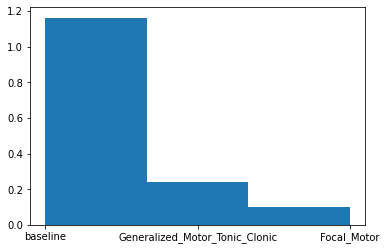

In [11]:
#Show the unequality of the classes in the data
plt.hist(df_final_multiclass_00172['label'], bins=3, density=True)
plt.show()

In [12]:
# reshape the y for training with the splitted dataset
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'baseline', 'label'] = 0
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'Generalized_Motor_Tonic_Clonic', 'label'] = 1
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'Focal_Motor', 'label'] = 2

In [13]:
#y_00172_yReshaped = tf.keras.utils.to_categorical(df_final_multiclass_00172['label'], num_classes=3)
#y_00172_yReshaped

In [14]:
x_00172_multi = df_final_multiclass_00172.iloc[:,0:161]
x_00172_multi

y_00172_multi = df_final_multiclass_00172.iloc[:,161]
y_00172_multi

0          baseline
1          baseline
2          baseline
3          baseline
4          baseline
           ...     
1231    Focal_Motor
1232    Focal_Motor
1233    Focal_Motor
1234    Focal_Motor
1235    Focal_Motor
Name: label, Length: 1236, dtype: object

In [15]:
#Train-test Split
X_train_multi, X_test_multi, y_train_multi, y_test_multi  = train_test_split(x_00172_multi, y_00172_multi, test_size=0.3, random_state=22, stratify = y_00172_multi) # train_test_split of X and Y with test size 30%

### Binary: Create y column on baseline 

In [16]:
#Transform the last collumn of the baseline to 1s
s_00172[:,161][s_00172[:,161] !=0] = 1

In [17]:
#### Create dataset for patient 00172

In [18]:
s_00172.shape

(279, 162)

In [19]:
#Concatenate baseline and seizures data
pat_00172 = np.concatenate((b_00172, s_00172))
pat_00172.shape

(1236, 162)

In [20]:
#Transform the array in a data frame
pat_00172 = pd.DataFrame(pat_00172)
pat_00172

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,-45.853971,-45.956754,0.061820,0.248637,464.557177,-0.381303,0.889292,0.316360,45.854645,0.580988,...,0.000728,0.308848,-0.000091,-0.000060,153757.322000,2.0,1.0,-0.000324,2559.0,0.0
1,-45.425826,-45.340952,0.116628,0.341508,752.075409,-1.235731,-0.274684,0.605115,45.427109,0.572857,...,0.000416,0.282150,-0.000068,-0.000034,152874.215927,2.0,2.0,-0.000207,2559.0,0.0
2,-45.346774,-45.214769,0.124045,0.352200,713.457683,-0.867209,-0.726939,0.539905,45.348142,0.651909,...,0.000416,0.334855,-0.000050,-0.000006,152179.803226,4.0,5.0,-0.000231,2559.0,0.0
3,-45.562092,-45.595285,0.129937,0.360467,839.248614,-1.529438,0.163558,0.723650,45.563518,0.584391,...,0.000728,0.363882,-0.000060,-0.000014,151550.671846,2.0,4.0,-0.000148,2559.0,0.0
4,-45.511712,-45.457352,0.095257,0.308637,691.566821,-1.345081,-0.138979,0.559674,45.512759,0.486965,...,0.000728,0.408850,-0.000055,-0.000007,150949.012493,2.0,4.0,-0.000252,2559.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-4.086543,-4.237667,1.495081,1.222735,2362.818466,-0.220147,0.616912,1.864045,4.265550,3.085235,...,0.000416,0.185900,-0.000035,0.000000,148541.602702,1.0,2.0,-0.000123,2559.0,1.0
1232,-5.138592,-5.182941,0.248040,0.498036,947.791971,-0.020952,0.395573,0.443305,5.162671,1.169775,...,0.000417,0.293430,-0.000047,-0.000003,147984.454510,2.0,2.0,-0.000177,2559.0,1.0
1233,-5.219049,-5.153994,0.066044,0.256990,506.327890,0.604149,-0.981906,0.353897,5.225373,0.903664,...,0.000417,0.329235,-0.000039,-0.000007,147501.799590,4.0,3.0,-0.000290,2559.0,1.0
1234,-4.776032,-4.901673,0.184745,0.429820,920.100524,-0.642823,-0.173119,0.676031,4.795334,1.136148,...,0.000417,0.278277,-0.000019,0.000000,147233.991513,4.0,4.0,-0.000126,2559.0,1.0


#### Select only explanatory variables

In [21]:
features_00172 = pat_00172.iloc[: , :-1]
features_00172

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,-45.853971,-45.956754,0.061820,0.248637,464.557177,-0.381303,0.889292,0.316360,45.854645,0.580988,...,0.0,0.000728,0.308848,-0.000091,-0.000060,153757.322000,2.0,1.0,-0.000324,2559.0
1,-45.425826,-45.340952,0.116628,0.341508,752.075409,-1.235731,-0.274684,0.605115,45.427109,0.572857,...,0.0,0.000416,0.282150,-0.000068,-0.000034,152874.215927,2.0,2.0,-0.000207,2559.0
2,-45.346774,-45.214769,0.124045,0.352200,713.457683,-0.867209,-0.726939,0.539905,45.348142,0.651909,...,0.0,0.000416,0.334855,-0.000050,-0.000006,152179.803226,4.0,5.0,-0.000231,2559.0
3,-45.562092,-45.595285,0.129937,0.360467,839.248614,-1.529438,0.163558,0.723650,45.563518,0.584391,...,0.0,0.000728,0.363882,-0.000060,-0.000014,151550.671846,2.0,4.0,-0.000148,2559.0
4,-45.511712,-45.457352,0.095257,0.308637,691.566821,-1.345081,-0.138979,0.559674,45.512759,0.486965,...,0.0,0.000728,0.408850,-0.000055,-0.000007,150949.012493,2.0,4.0,-0.000252,2559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-4.086543,-4.237667,1.495081,1.222735,2362.818466,-0.220147,0.616912,1.864045,4.265550,3.085235,...,0.0,0.000416,0.185900,-0.000035,0.000000,148541.602702,1.0,2.0,-0.000123,2559.0
1232,-5.138592,-5.182941,0.248040,0.498036,947.791971,-0.020952,0.395573,0.443305,5.162671,1.169775,...,0.0,0.000417,0.293430,-0.000047,-0.000003,147984.454510,2.0,2.0,-0.000177,2559.0
1233,-5.219049,-5.153994,0.066044,0.256990,506.327890,0.604149,-0.981906,0.353897,5.225373,0.903664,...,0.0,0.000417,0.329235,-0.000039,-0.000007,147501.799590,4.0,3.0,-0.000290,2559.0
1234,-4.776032,-4.901673,0.184745,0.429820,920.100524,-0.642823,-0.173119,0.676031,4.795334,1.136148,...,0.0,0.000417,0.278277,-0.000019,0.000000,147233.991513,4.0,4.0,-0.000126,2559.0


## Binary Classification Task

### 1. Feature Selection

### 1.1 PCA ANALYSIS
To all variables

In [22]:
#To standardize the data

norm_00172 = StandardScaler().fit_transform(features_00172)
norm_00172.shape

(1236, 161)

In [23]:
pca = PCA(n_components=25)
pca_00172 = pca.fit_transform(norm_00172)

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.12268429 0.10544047 0.08036289 0.06360328 0.05159224 0.04017338
 0.03902927 0.03463566 0.03224417 0.03006583 0.02205293 0.02000131
 0.01908662 0.01823556 0.01537093 0.01472263 0.01396603 0.01300471
 0.01173583 0.01028691 0.0101557  0.00968232 0.00924313 0.00909976
 0.00860457]


In [24]:
# Keep PCs until 80% explained variance is achieved. 20 PCs are enough
sum(pca.explained_variance_ratio_)

0.8050804311376667

In [25]:
### 1.2 Filter method: correlation

In [26]:
redExtractedFeat = list(features_00172.keys()) # this will hold the reduced feature set
trmv = []
red_feature_vector = features_00172.values

while 1:
    
    oldF = redExtractedFeat
    
    # combine current set of features, two at a time
    comb = combinations(range(len(oldF)), 2) 
    
    for f in list(comb):
        # find correlation between the two features in analysis
        corr = pearson_correlation(red_feature_vector[:, f[0]], red_feature_vector[:, f[1]])[0]
        
        if corr > 0.95:
            print("Highly Corr: ", oldF[f[0]], oldF[f[1]], corr)
            trmv += [redExtractedFeat[f[0]]]
            redExtractedFeat = np.delete(oldF, f[0])
            red_feature_vector = np.delete(red_feature_vector, f[0], axis=1)
            break
            
    if len(redExtractedFeat) == len(oldF):
        break

Highly Corr:  0 1 0.9919837971479915
Highly Corr:  3 4 0.9714185970576824
Highly Corr:  4 7 0.9539256379142186
Highly Corr:  8 14 0.9716868192016505
Highly Corr:  14 23 0.9999999904616848


C:\Users\Carolina\anaconda3\lib\site-packages\scipy\stats\stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Highly Corr:  16 20 1.0
Highly Corr:  24 25 0.9613142075760739
Highly Corr:  30 42 0.9999999949085311
Highly Corr:  31 32 0.9637217173009406
Highly Corr:  32 36 0.9637201238810259
Highly Corr:  35 41 0.9585867261483074
Highly Corr:  37 39 0.9777127721489941
Highly Corr:  39 47 0.9659247282281088
Highly Corr:  41 44 0.9997501878128073
Highly Corr:  42 51 0.9999921387299419
Highly Corr:  44 48 0.9999999999999997
Highly Corr:  52 53 0.9983971308469851
Highly Corr:  58 59 0.9827270517340877
Highly Corr:  59 60 0.9724919376933042
Highly Corr:  64 70 0.9888779393469623
Highly Corr:  69 72 0.9514447125695568
Highly Corr:  70 79 0.9999997285061378
Highly Corr:  72 76 0.9999999999999999
Highly Corr:  80 81 0.9936647968831424
Highly Corr:  84 85 1.0
Highly Corr:  90 95 0.9562621271689509
Highly Corr:  91 95 0.9817252810865242
Highly Corr:  96 104 0.9746082389933721
Highly Corr:  98 99 0.977315117025745
Highly Corr:  105 112 0.9850469239239711
Highly Corr:  107 108 0.9829225326361628
Highly Corr:

In [27]:
print(f'previous features: {len(list(features_00172.keys()))} | new features: {red_feature_vector.shape[1]}')
redExtractedFeat

previous features: 161 | new features: 113


array([  1,   2,   5,   6,   7,   9,  10,  11,  12,  13,  15,  17,  18,
        19,  20,  21,  22,  23,  25,  26,  27,  28,  29,  33,  34,  36,
        38,  40,  43,  45,  46,  47,  48,  49,  50,  51,  53,  54,  55,
        56,  57,  60,  61,  62,  63,  65,  66,  67,  68,  71,  73,  74,
        75,  76,  77,  78,  79,  81,  82,  83,  85,  86,  87,  88,  89,
        92,  93,  94,  95,  97,  99, 100, 101, 102, 103, 104, 106, 109,
       111, 113, 114, 117, 118, 120, 121, 122, 123, 124, 126, 127, 128,
       129, 130, 131, 132, 137, 138, 139, 140, 142, 143, 148, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160])

In [28]:
features_00172 = features_00172.to_numpy()

In [29]:
corr_00172 = features_00172[:,redExtractedFeat]

In [30]:
corr_00172

array([[-4.59567544e+01,  6.18203192e-02, -3.81303221e-01, ...,
         1.00000000e+00, -3.24241200e-04,  2.55900000e+03],
       [-4.53409522e+01,  1.16627766e-01, -1.23573081e+00, ...,
         2.00000000e+00, -2.07433414e-04,  2.55900000e+03],
       [-4.52147686e+01,  1.24044864e-01, -8.67208601e-01, ...,
         5.00000000e+00, -2.30997050e-04,  2.55900000e+03],
       ...,
       [-5.15399404e+00,  6.60437260e-02,  6.04149160e-01, ...,
         3.00000000e+00, -2.89896323e-04,  2.55900000e+03],
       [-4.90167312e+00,  1.84745003e-01, -6.42823238e-01, ...,
         4.00000000e+00, -1.26340532e-04,  2.55900000e+03],
       [-4.51114846e+00,  2.46865485e+00,  2.01745417e+01, ...,
         1.00000000e+00, -1.15015999e-04,  2.55900000e+03]])

In [31]:
#y = b_00172[:,161]
#y.shape

In [32]:
#corr_00172.shape

In [33]:
#step_corr_data = np.concatenate((corr_00172,y))


#### 1.2.1 PCA on extracted

In [34]:
extracted_00172 = StandardScaler().fit_transform(corr_00172)
extracted_00172.shape

(1236, 113)

In [35]:
pca_extracted_00172 = PCA(n_components=32)
principalComponents = pca_extracted_00172.fit_transform(extracted_00172)

print('Explained variation per principal component: {}'.format(pca_extracted_00172.explained_variance_ratio_))

Explained variation per principal component: [0.10358206 0.09126469 0.06586245 0.05128963 0.04739936 0.03748578
 0.03387238 0.0328147  0.02842832 0.02562369 0.02332173 0.02170261
 0.02078582 0.01990821 0.0186647  0.01590496 0.01469657 0.01421068
 0.01369289 0.01347973 0.01292428 0.01237674 0.01216753 0.01134378
 0.01119994 0.0109774  0.01004764 0.00991208 0.00959295 0.00911416
 0.00873039 0.00843838]


In [36]:
# Keep PCs until 80% explained variance is achieved. 32 PCs are needed
sum(pca_extracted_00172.explained_variance_ratio_)

0.8208162377359457

### 1.4 Wrapper methods

In [37]:
pat_00172

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,161
0,-45.853971,-45.956754,0.061820,0.248637,464.557177,-0.381303,0.889292,0.316360,45.854645,0.580988,...,0.000728,0.308848,-0.000091,-0.000060,153757.322000,2.0,1.0,-0.000324,2559.0,0.0
1,-45.425826,-45.340952,0.116628,0.341508,752.075409,-1.235731,-0.274684,0.605115,45.427109,0.572857,...,0.000416,0.282150,-0.000068,-0.000034,152874.215927,2.0,2.0,-0.000207,2559.0,0.0
2,-45.346774,-45.214769,0.124045,0.352200,713.457683,-0.867209,-0.726939,0.539905,45.348142,0.651909,...,0.000416,0.334855,-0.000050,-0.000006,152179.803226,4.0,5.0,-0.000231,2559.0,0.0
3,-45.562092,-45.595285,0.129937,0.360467,839.248614,-1.529438,0.163558,0.723650,45.563518,0.584391,...,0.000728,0.363882,-0.000060,-0.000014,151550.671846,2.0,4.0,-0.000148,2559.0,0.0
4,-45.511712,-45.457352,0.095257,0.308637,691.566821,-1.345081,-0.138979,0.559674,45.512759,0.486965,...,0.000728,0.408850,-0.000055,-0.000007,150949.012493,2.0,4.0,-0.000252,2559.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-4.086543,-4.237667,1.495081,1.222735,2362.818466,-0.220147,0.616912,1.864045,4.265550,3.085235,...,0.000416,0.185900,-0.000035,0.000000,148541.602702,1.0,2.0,-0.000123,2559.0,1.0
1232,-5.138592,-5.182941,0.248040,0.498036,947.791971,-0.020952,0.395573,0.443305,5.162671,1.169775,...,0.000417,0.293430,-0.000047,-0.000003,147984.454510,2.0,2.0,-0.000177,2559.0,1.0
1233,-5.219049,-5.153994,0.066044,0.256990,506.327890,0.604149,-0.981906,0.353897,5.225373,0.903664,...,0.000417,0.329235,-0.000039,-0.000007,147501.799590,4.0,3.0,-0.000290,2559.0,1.0
1234,-4.776032,-4.901673,0.184745,0.429820,920.100524,-0.642823,-0.173119,0.676031,4.795334,1.136148,...,0.000417,0.278277,-0.000019,0.000000,147233.991513,4.0,4.0,-0.000126,2559.0,1.0


In [38]:
x_00172 = pat_00172.iloc[:,0:160]
x_00172

y_00172 = pat_00172.iloc[:,161]
y_00172

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1231    1.0
1232    1.0
1233    1.0
1234    1.0
1235    1.0
Name: 161, Length: 1236, dtype: float64

#### 1.4.1 Foward selection

In [39]:
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(x_00172, y_00172)
#x_00172_forward = x_00172[:,forward]
#print(f'previous features: {len(list(red_feature_vector.keys()))} | new features: {sfs.shape[1]}')

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), k_features=11,
                          scoring='r2')

In [40]:
forward_00172 = sfs.transform(x_00172)
forward_00172.shape

(1236, 11)

#### 1.4.3 Step-wise selection

In [41]:
df_00172_x = pd.DataFrame(x_00172)
df_00172_y = pd.DataFrame(y_00172)

In [42]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [43]:
stepwise = stepwise_selection(df_00172_x, df_00172_y)
#backward is a list

C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' ins

C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' ins

In [44]:
stepwise_onExtracted = stepwise_selection(df_00172_x, df_00172_y)


C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' ins

C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
C:\Users\Carolina\AppData\Local\Temp/ipykernel_14132/2114219913.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' ins

In [45]:
stepwise_00172 = x_00172.iloc[:,stepwise]
stepwise_00172.shape

(1236, 33)

### 2.1 Segmentation

In [222]:
#Train-test split
X_train, X_test, y_train, y_test  = train_test_split(x_00172, y_00172, test_size=0.3, random_state=22) # train_test_split of X and Y with test size 30%

#### Forward Selection

In [223]:
X_train_forward, X_test_forward, y_train_forward, y_test_forward  = train_test_split(forward_00172, y_00172, test_size=0.3, random_state=22) # train_test_split of X and Y with test size 30%

#### Stepwise Selection

In [224]:
X_train_stepwise, X_test_stepwise, y_train_stepwise, y_test_stepwise  = train_test_split(stepwise_00172, y_00172, test_size=0.3, random_state=22) # train_test_split of X and Y with test size 30%

## 2. Binary Classification 

#### 2.2.1 SVM

In [225]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['auto', 'scale', 1, 0.1, 0.01, 0.001],'kernel': ['rbf', 'poly', 'sigmoid'], 'class_weight': ['balanced']}

In [226]:
gridSVM = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

In [227]:
ini = time.time()
gridSVM.fit(X_train,y_train)
fim = time.time()

print(gridSVM.best_estimator_)
print(gridSVM.best_params_)
print ("Time: ", fim-ini) #result = 18.51825475692749

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.01, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.01,

[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=auto, kernel=sigmoid; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, gamma=scale, kernel=poly; total time

[CV] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END C=1, class_weight=balanced, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...C=1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...C=1, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END

[CV] END ..C=10, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..C=10, class_weight=balanced, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END C=10, class_weight=balanced, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .C=10, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=10, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=10, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=10, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .C=10, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_we

[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.0s
[C

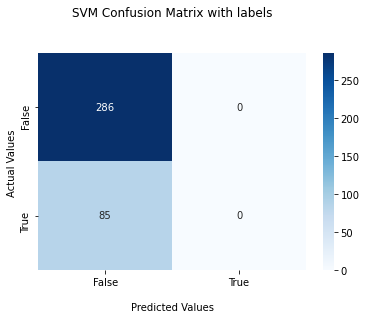

              precision    recall  f1-score   support

         0.0       0.77      1.00      0.87       286
         1.0       0.00      0.00      0.00        85

    accuracy                           0.77       371
   macro avg       0.39      0.50      0.44       371
weighted avg       0.59      0.77      0.67       371



C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
grid_predictions = gridSVM.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('SVM Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,grid_predictions))

#### 2.2.2 LDA

In [229]:
param_grid = {"solver": ["svd","sqr","eigen"], "shrinkage": ["auto",1,0.5,0.1,0.05,0.01,0.005,0.001]}

In [230]:
gridLDA = GridSearchCV(LDA(),param_grid,refit=True,verbose=2)

In [231]:
ini = time.time()
gridLDA.fit(X_train,y_train)
fim = time.time()

print(gridLDA.best_estimator_)
print(gridLDA.best_params_)
print ("Time: ", fim-ini) # result = 1.0591025352478027

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .......................shrinkage=auto, solver=eigen; total time=   0.0s
[CV] END .......................shrinkage=auto,

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

[CV] END ............................shrinkage=1, solver=svd; total time=   0.0s
[CV] END ............................shrinkage=1, solver=svd; total time=   0.0s
[CV] END ............................shrinkage=1, solver=svd; total time=   0.0s
[CV] END ............................shrinkage=1, solver=svd; total time=   0.0s
[CV] END ............................shrinkage=1, solver=svd; total time=   0.0s
[CV] END ............................shrinkage=1, solver=sqr; total time=   0.0s
[CV] END ............................shrinkage=1, solver=sqr; total time=   0.0s
[CV] END ............................shrinkage=1, solver=sqr; total time=   0.0s
[CV] END ............................shrinkage=1, solver=sqr; total time=   0.0s
[CV] END ............................shrinkage=1, solver=sqr; total time=   0.0s
[CV] END ..........................shrinkage=1, solver=eigen; total time=   0.0s
[CV] END ..........................shrinkage=1, solver=eigen; total time=   0.0s
[CV] END ...................

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

[CV] END ........................shrinkage=0.5, solver=eigen; total time=   0.0s
[CV] END ........................shrinkage=0.5, solver=eigen; total time=   0.0s
[CV] END ........................shrinkage=0.5, solver=eigen; total time=   0.0s
[CV] END ........................shrinkage=0.5, solver=eigen; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=sqr; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=sqr; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=sqr; total time=   0.0s
[CV] END ...................

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

[CV] END ........................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=0.05, solver=sqr; total time=   0.0s
[CV] END .......................shrinkage=0.05, solver=eigen; total time=   0.0s
[CV] END ...................

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

[CV] END .......................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV] END .......................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV] END .......................shrinkage=0.01, solver=eigen; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=sqr; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=sqr; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=sqr; total time=   0.0s
[CV] END ........................shrinkage=0.005, solver=sqr; total time=   0.0s
[CV] END ...................

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

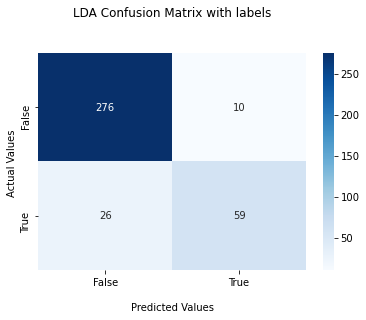

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       286
         1.0       0.86      0.69      0.77        85

    accuracy                           0.90       371
   macro avg       0.88      0.83      0.85       371
weighted avg       0.90      0.90      0.90       371



In [232]:
grid_predictions = gridLDA.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('LDA Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,grid_predictions))

In [233]:
balanced_accuracy_score(y_test, grid_predictions)

0.8295763060468943

#### 2.2.3 QDA

In [69]:
param_grid = {}

In [70]:
gridQDA = GridSearchCV(QDA(),param_grid,refit=True,verbose=2)

In [71]:
ini = time.time()
gridQDA.fit(X_train,y_train)
fim = time.time()

print(gridQDA.best_estimator_)
print(gridQDA.best_params_)
print ("Time: ", fim-ini) #0.09843921661376953

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
QuadraticDiscriminantAnalysis()
{}
Time:  0.09902238845825195


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


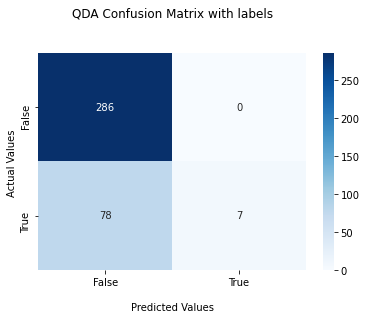

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88       286
         1.0       1.00      0.08      0.15        85

    accuracy                           0.79       371
   macro avg       0.89      0.54      0.52       371
weighted avg       0.83      0.79      0.71       371



In [72]:
grid_predictions = gridQDA.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('QDA Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,grid_predictions))

#### 2.2.4 MLP

In [74]:
param_grid = {"hidden_layer_sizes":[(50),(100),(150),(200)],"activation":["identity", "relu", "logistic", "tanh"], "learning_rate": ["constant", "adaptive", "invscaling"], "solver": ["lbfgs", "sgd", "adam"], "early_stopping": [False, True]}

In [75]:
gridMLP = GridSearchCV(MLPClassifier(),param_grid,refit=True,verbose=2)

In [76]:
ini = time.time()
gridMLP.fit(X_train,y_train)
fim = time.time()

print(gridMLP.best_estimator_)
print(gridMLP.best_params_)
print ("Time: ", fim-ini) #

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:264: RuntimeWarning: overflow encountered in double_scalars
  values += np.dot(s, s)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learni

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeW

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learn

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_r

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=10

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-pac

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, sol

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam;

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscali

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sg

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sg

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscal

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam;

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscali

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam;

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total ti

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, sol

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, sol

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_ra

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.9s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_s

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   3.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   3.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   1.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_s

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   4.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   5.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   4.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   2.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   3.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   4.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_ra

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.8s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   1.8s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.7s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   2.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   3.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   3.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   2.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   2.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   3.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   4.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   4.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; to

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.5s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.5s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invsc

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.7s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscali

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.5s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscali

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.5s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.5s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.5s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.5s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.5s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.8s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.8s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.7s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


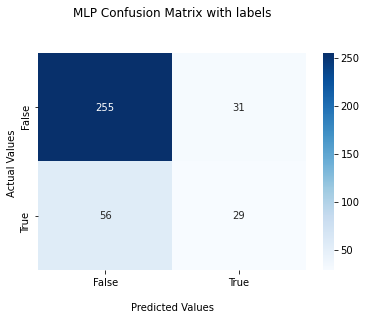

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       286
         1.0       0.48      0.34      0.40        85

    accuracy                           0.77       371
   macro avg       0.65      0.62      0.63       371
weighted avg       0.74      0.77      0.75       371



In [77]:
grid_predictions = gridMLP.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('MLP Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,grid_predictions))

#### 2.2.5 KNN 

In [79]:
param_grid = {"n_neighbors": [3, 5, 7, 9],"weights": ["uniform", "distance"],"algorithm": ["auto", "ball_tree", "kd_tree", "brute"],"p":[1,2]}

In [80]:
gridKNN = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=2)

In [81]:
ini = time.time()
gridKNN.fit(X_train,y_train)
fim = time.time()

print(gridKNN.best_estimator_)
print(gridKNN.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=

[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1

[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=uniform; total 

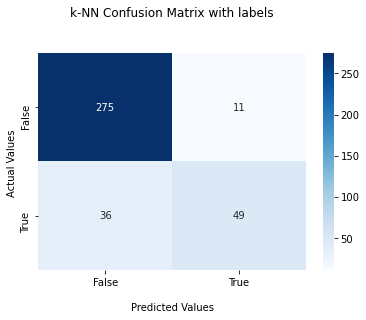

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       286
         1.0       0.82      0.58      0.68        85

    accuracy                           0.87       371
   macro avg       0.85      0.77      0.80       371
weighted avg       0.87      0.87      0.87       371



In [82]:
grid_predictions = gridKNN.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('k-NN Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,grid_predictions))

#### 2.2.6 Gaussian NB

In [84]:
param_grid = {}

In [85]:
gridGNB = GridSearchCV(GaussianNB(),param_grid,refit=True,verbose=2)

In [86]:
ini = time.time()
gridGNB.fit(X_train,y_train)
fim = time.time()

print(gridGNB.best_estimator_)
print(gridGNB.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
GaussianNB()
{}
Time:  0.03000617027282715


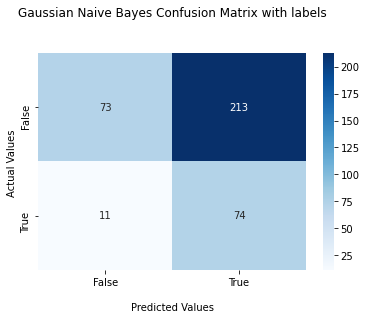

              precision    recall  f1-score   support

         0.0       0.87      0.26      0.39       286
         1.0       0.26      0.87      0.40        85

    accuracy                           0.40       371
   macro avg       0.56      0.56      0.40       371
weighted avg       0.73      0.40      0.40       371



In [87]:
grid_predictions = gridGNB.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Gaussian Naive Bayes Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,grid_predictions))

#### 2.2.7 Random Forest 

In [234]:
param_grid = {"n_estimators": [10, 50, 100, 150, 200], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"]}

In [235]:
gridRF = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2)

In [236]:
ini = time.time()
gridRF.fit(X_train,y_train)
fim = time.time()

print(gridRF.best_estimator_)
print(gridRF.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_features=auto, n_e

[CV] END criterion=entropy, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=150; total time=   0.5

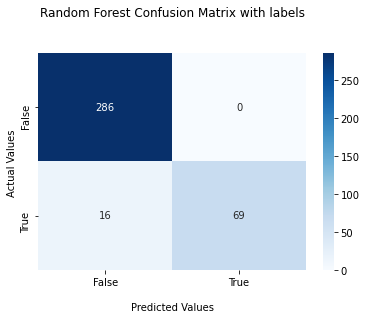

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       286
         1.0       1.00      0.81      0.90        85

    accuracy                           0.96       371
   macro avg       0.97      0.91      0.93       371
weighted avg       0.96      0.96      0.96       371



In [237]:
grid_predictions = gridRF.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Random Forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,grid_predictions))

In [238]:
balanced_accuracy_score(y_test, grid_predictions)

0.9058823529411765

#### 2.2.8 AdaBoost 

In [239]:
param_grid = {"n_estimators": [10, 25, 50, 100, 150], "learning_rate": [0.5, 0.6, 0.7, 0.8, 1.0, 1.2, 1.5],"algorithm":  ["SAMME", "SAMME.R"]}

In [240]:
gridADB = GridSearchCV(AdaBoostClassifier(),param_grid,refit=True,verbose=2)

In [241]:
ini = time.time()
gridADB.fit(X_train,y_train)
fim = time.time()

print(gridADB.best_estimator_)
print(gridADB.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.5, n_

[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, le

[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=50; total time=   0.3s
[CV]

[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=50; total time=   0.3s
[CV]

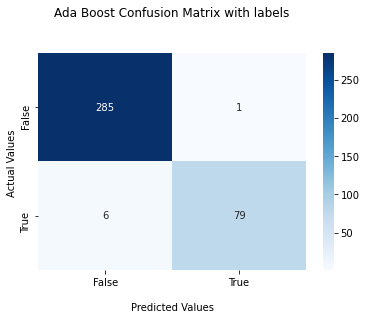

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       286
         1.0       0.99      0.93      0.96        85

    accuracy                           0.98       371
   macro avg       0.98      0.96      0.97       371
weighted avg       0.98      0.98      0.98       371



In [242]:
grid_predictions = gridADB.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Ada Boost Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test,grid_predictions)) 

In [243]:
balanced_accuracy_score(y_test, grid_predictions)

0.9629576306046894

#### 2.2.9 Decision Tree

In [99]:
param_grid = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"],"max_features": ["auto", "sqrt", "log2"], "class_weight": ["balanced"]}

In [100]:
gridDT = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=2)

In [101]:
ini = time.time()
gridDT.fit(X_train,y_train)
fim = time.time()

print(gridDT.best_estimator_)
print(gridDT.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV] END class_weight=

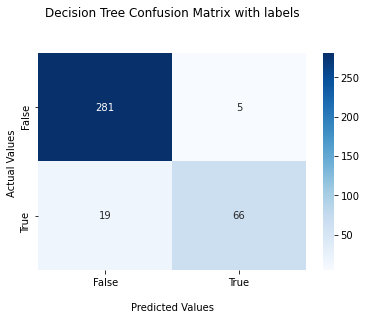

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       286
         1.0       0.93      0.78      0.85        85

    accuracy                           0.94       371
   macro avg       0.93      0.88      0.90       371
weighted avg       0.94      0.94      0.93       371



In [102]:
grid_predictions = gridDT.predict(X_test)

cf_matrix = confusion_matrix(y_test,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Decision Tree Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


print(classification_report(y_test,grid_predictions))

## 3. Multiclass Classification

In [49]:
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 0.0, 'label'] = 'baseline'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 1.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 2.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 3.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 4.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 5.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 6.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 7.0, 'label'] = 'Generalized_Motor_Tonic_Clonic'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 8.0, 'label'] = 'Focal_Motor'
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 9.0, 'label'] = 'Focal_Motor'

df_final_multiclass_wLabel_00172 = df_final_multiclass_00172
df_final_multiclass_wLabel_00172

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,label
0,-45.853971,-45.956754,0.061820,0.248637,464.557177,-0.381303,0.889292,0.316360,45.854645,0.580988,...,0.000728,0.308848,-0.000091,-0.000060,153757.322000,2.0,1.0,-0.000324,2559.0,baseline
1,-45.425826,-45.340952,0.116628,0.341508,752.075409,-1.235731,-0.274684,0.605115,45.427109,0.572857,...,0.000416,0.282150,-0.000068,-0.000034,152874.215927,2.0,2.0,-0.000207,2559.0,baseline
2,-45.346774,-45.214769,0.124045,0.352200,713.457683,-0.867209,-0.726939,0.539905,45.348142,0.651909,...,0.000416,0.334855,-0.000050,-0.000006,152179.803226,4.0,5.0,-0.000231,2559.0,baseline
3,-45.562092,-45.595285,0.129937,0.360467,839.248614,-1.529438,0.163558,0.723650,45.563518,0.584391,...,0.000728,0.363882,-0.000060,-0.000014,151550.671846,2.0,4.0,-0.000148,2559.0,baseline
4,-45.511712,-45.457352,0.095257,0.308637,691.566821,-1.345081,-0.138979,0.559674,45.512759,0.486965,...,0.000728,0.408850,-0.000055,-0.000007,150949.012493,2.0,4.0,-0.000252,2559.0,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-4.086543,-4.237667,1.495081,1.222735,2362.818466,-0.220147,0.616912,1.864045,4.265550,3.085235,...,0.000416,0.185900,-0.000035,0.000000,148541.602702,1.0,2.0,-0.000123,2559.0,Focal_Motor
1232,-5.138592,-5.182941,0.248040,0.498036,947.791971,-0.020952,0.395573,0.443305,5.162671,1.169775,...,0.000417,0.293430,-0.000047,-0.000003,147984.454510,2.0,2.0,-0.000177,2559.0,Focal_Motor
1233,-5.219049,-5.153994,0.066044,0.256990,506.327890,0.604149,-0.981906,0.353897,5.225373,0.903664,...,0.000417,0.329235,-0.000039,-0.000007,147501.799590,4.0,3.0,-0.000290,2559.0,Focal_Motor
1234,-4.776032,-4.901673,0.184745,0.429820,920.100524,-0.642823,-0.173119,0.676031,4.795334,1.136148,...,0.000417,0.278277,-0.000019,0.000000,147233.991513,4.0,4.0,-0.000126,2559.0,Focal_Motor


In [50]:
x_00172_multi = df_final_multiclass_wLabel_00172.iloc[:,0:161]
x_00172_multi

y_00172_multi = df_final_multiclass_wLabel_00172.iloc[:,161]
y_00172_multi

0          baseline
1          baseline
2          baseline
3          baseline
4          baseline
           ...     
1231    Focal_Motor
1232    Focal_Motor
1233    Focal_Motor
1234    Focal_Motor
1235    Focal_Motor
Name: label, Length: 1236, dtype: object

In [51]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi  = train_test_split(x_00172_multi, y_00172_multi, test_size=0.3, random_state=22, stratify = y_00172_multi) # train_test_split of X and Y with test size 30%

### 3.1 SVM

#### Grid Search

In [52]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['auto', 'scale', 1, 0.1, 0.01],'kernel': ['rbf', 'poly'], 'class_weight': ['balanced'], 'decision_function_shape': ['ovo', 'ovr']}

In [53]:
gridSVM = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
#yy_01870
#y_train_multi=y_train_multi.astype('int') 

In [54]:
ini = time.time()
gridSVM.fit(X_train_multi,y_train_multi)
fim = time.time()

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovo, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision

[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=1, kernel=poly; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=0.1, c

[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, class_weight=balanced, decision_function_shape=ovr, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, c

[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10, class_weight=balanced, decision_function_shape=ovo, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=10,

[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovo, gamma=scale, kernel=poly; total t

[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END C=100, class_weight=balanced, decision_function_shape=ovr, gamma=0.01, kernel=poly; total time=   0.0s


In [55]:
print(gridSVM.best_estimator_)
print(gridSVM.best_params_)
print ("Time: ", fim-ini) #result = 24sec

SVC(C=0.1, class_weight='balanced', decision_function_shape='ovo', gamma='auto')
{'C': 0.1, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}
Time:  25.79470181465149


In [56]:
class_names = ['Generalized_Motor_Tonic_Clonic', 'Focal_Motor', 'baseline']

In [57]:
pred_svm = gridSVM.predict(X_test_multi)

In [58]:
#y_test_multi = y_test_multi.to_string()

In [59]:
#Check predicted values
pred_svm

array(['baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseli

In [60]:
#To convert from Series to an array
y_test_multi = y_test_multi.values

In [61]:
#check test values
y_test_multi

array(['baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline',
       'Generalized_Motor_Tonic_Clonic', 'baseline', 'baseline',
       'baseline', 'Generalized_Motor_Tonic_Clonic', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'Focal_Motor', 'Focal_Motor',
       'Generalized_Motor_Tonic_Clonic', 'baseline', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline', 'baseline',
       'Focal_Motor', 'baseline', 'baseline', 'baseline', 'baseline',
       'baseline', 'Generalized_Motor_Tonic_Clonic', 'baseline',
       'baseline', 'baseline', 'baseline', 'baseline',
       'Generalized_Motor_Tonic_Clonic', 'Generalized_Motor_Tonic_Clonic',
       'baseline', 'Generalized_Motor_Tonic_Clonic', 'baseline',
       'baseline', 'baseline', 'Generalized_Motor_Tonic_Clonic',
       'baseline', 'baseline', 'baseline',
       'Generalized_Motor_Tonic_Clonic', 'baseline

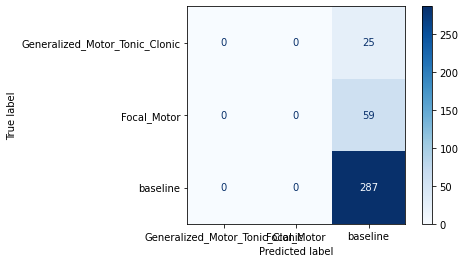

In [62]:
cm = confusion_matrix(y_test_multi,pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [63]:
balanced_accuracy_score(y_test_multi, pred_svm)

0.3333333333333333

### 3.2 MLP

In [64]:
#Grid search
#mlp = MLPClassifier(max_iter=100)

In [65]:
param_grid = {"hidden_layer_sizes":[(50),(100),(150),(200)],"activation":["identity", "relu", "logistic", "tanh"], "learning_rate": ["constant", "adaptive", "invscaling"], "solver": ["lbfgs", "sgd", "adam"], "early_stopping": [False, True]}

In [66]:
gridMLP = GridSearchCV(MLPClassifier(),param_grid,refit=True,verbose=2)

In [67]:
ini = time.time()
gridMLP.fit(X_train_multi,y_train_multi)
fim = time.time()

print(gridMLP.best_estimator_)
print(gridMLP.best_params_)
print ("Time: ", fim-ini) #

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\skl

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.5s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neura

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X -

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\li

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neura

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.8s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.8s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_si

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adap

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X -

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X -

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=150

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: o

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: overflow encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\util

[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, early_stopping=True, hidden_layer_sizes=200

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; tot

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, sol

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam;

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscali

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=150, learning_rate=invsc

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscali

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam;

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total ti

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increa

[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total 

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.1s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relu, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, sol

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   1.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   1.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   1.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   1.7s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   1.7s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_s

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   5.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   5.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   3.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   4.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   3.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   2.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   5.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   3.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   3.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   3.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   2.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.0s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.5s
[CV] END activation=logistic, early_stopping=False, hidden_layer_s

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=consta

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=adapti

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=50, learn

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   1.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   1.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.4s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   1.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=100

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.6s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   2.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=150

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   3.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   3.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   2.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   7.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   3.0s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   4.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   3.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   2.9s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rat

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.5s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   3.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   2.9s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=logistic, early_stopping=True, hidden_layer_sizes=200

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.4s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.4s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam; total time=   0.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.7s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.7s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.6s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.6s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.4s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.7s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.8s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.9s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.9s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.9s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.9s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=150, learning_rate=invscal

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   1.1s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   1.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   1.1s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   1.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.5s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.5s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.2s
[CV] END activation=tanh, early_stopping=False, hidden_layer_sizes=200, learning_rate=invscali

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=constant, solver=adam; total time=   0

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=sgd; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=adaptive, solver=adam; total time=   0

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.3s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.2s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=lbfgs; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=50, learning_rate=invscaling, solver=adam

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=lbfgs; total time=   0.7s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=constant, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=lbfgs; total time=   0.7s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=sgd; total time=   0.2s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.8s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=lbfgs; total time=   0.7s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=100, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   1.7s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=lbfgs; total time=   0.9s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=constant, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   1.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=lbfgs; total time=   0.9s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   0.9s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.0s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=lbfgs; total time=   1.4s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=150, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=lbfgs; total time=   1.6s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=constant, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.6s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.4s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=lbfgs; total time=   1.5s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.3s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=sgd; total time=   0.4s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=adaptive, solver=adam; total t

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.5s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.4s


C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=lbfgs; total time=   1.5s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solver=adam; total time=   0.1s
[CV] END activation=tanh, early_stopping=True, hidden_layer_sizes=200, learning_rate=invscaling, solv

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


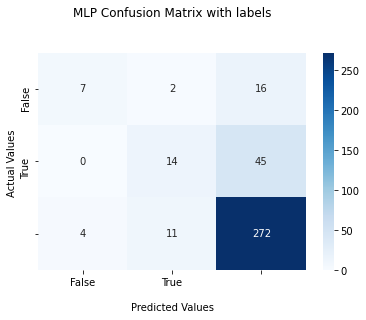

                                precision    recall  f1-score   support

                   Focal_Motor       0.64      0.28      0.39        25
Generalized_Motor_Tonic_Clonic       0.52      0.24      0.33        59
                      baseline       0.82      0.95      0.88       287

                      accuracy                           0.79       371
                     macro avg       0.66      0.49      0.53       371
                  weighted avg       0.76      0.79      0.76       371



In [68]:
grid_predictions = gridMLP.predict(X_test_multi)

cf_matrix = confusion_matrix(y_test_multi,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('MLP Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test_multi,grid_predictions))

In [69]:
balanced_accuracy_score(y_test_multi, grid_predictions)

0.48834110907695033

In [70]:
#import sklearn
#unique_classes = np.unique(y_00172_multi)
#weights = sklearn.utils.class_weight.compute_class_weight('balanced', unique_classes, y_00172_multi)
#class_weight_dict = dict(enumerate(weights))
#print(weights)
#print(class_weight_dict)

In [71]:
#rand_forest = RandomForestClassifier(n_estimators=100, criterion='entropy',class_weight=class_weight_dict ,min_impurity_decrease=0.01)

In [72]:
#print(balanced_accuracy_score(y_test, y_pred_forest))#

### 3.3 RandomForestClassifier

In [205]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [206]:
# reshape the y for training with the splitted dataset
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'baseline', 'label'] = 0
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'Generalized_Motor_Tonic_Clonic', 'label'] = 1
df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'Focal_Motor', 'label'] = 2

In [207]:
df_final_multiclass_00172 # We keep numbers and not str as labels

,0,1,2,3,4,5,6,7,8,9,...,152,153,154,155,156,157,158,159,160,label
0,-45.853971,-45.956754,0.061820,0.248637,464.557177,-0.381303,0.889292,0.316360,45.854645,0.580988,...,0.000728,0.308848,-0.000091,-0.000060,153757.322000,2.0,1.0,-0.000324,2559.0,0
1,-45.425826,-45.340952,0.116628,0.341508,752.075409,-1.235731,-0.274684,0.605115,45.427109,0.572857,...,0.000416,0.282150,-0.000068,-0.000034,152874.215927,2.0,2.0,-0.000207,2559.0,0
2,-45.346774,-45.214769,0.124045,0.352200,713.457683,-0.867209,-0.726939,0.539905,45.348142,0.651909,...,0.000416,0.334855,-0.000050,-0.000006,152179.803226,4.0,5.0,-0.000231,2559.0,0
3,-45.562092,-45.595285,0.129937,0.360467,839.248614,-1.529438,0.163558,0.723650,45.563518,0.584391,...,0.000728,0.363882,-0.000060,-0.000014,151550.671846,2.0,4.0,-0.000148,2559.0,0
4,-45.511712,-45.457352,0.095257,0.308637,691.566821,-1.345081,-0.138979,0.559674,45.512759,0.486965,...,0.000728,0.408850,-0.000055,-0.000007,150949.012493,2.0,4.0,-0.000252,2559.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,-4.086543,-4.237667,1.495081,1.222735,2362.818466,-0.220147,0.616912,1.864045,4.265550,3.085235,...,0.000416,0.185900,-0.000035,0.000000,148541.602702,1.0,2.0,-0.000123,2559.0,2
1232,-5.138592,-5.182941,0.248040,0.498036,947.791971,-0.020952,0.395573,0.443305,5.162671,1.169775,...,0.000417,0.293430,-0.000047,-0.000003,147984.454510,2.0,2.0,-0.000177,2559.0,2
1233,-5.219049,-5.153994,0.066044,0.256990,506.327890,0.604149,-0.981906,0.353897,5.225373,0.903664,...,0.000417,0.329235,-0.000039,-0.000007,147501.799590,4.0,3.0,-0.000290,2559.0,2
1234,-4.776032,-4.901673,0.184745,0.429820,920.100524,-0.642823,-0.173119,0.676031,4.795334,1.136148,...,0.000417,0.278277,-0.000019,0.000000,147233.991513,4.0,4.0,-0.000126,2559.0,2


In [208]:
x_00172_multi = df_final_multiclass_00172.iloc[:,0:161]
x_00172_multi

y_00172_multi = df_final_multiclass_00172.iloc[:,161]
y_00172_multi

0       0
1       0
2       0
3       0
4       0
       ..
1231    2
1232    2
1233    2
1234    2
1235    2
Name: label, Length: 1236, dtype: object

In [209]:
#train-test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi  = train_test_split(x_00172_multi, y_00172_multi, test_size=0.3, random_state=22, stratify = y_00172_multi) # train_test_split of X and Y with test size 30%

In [210]:
#standardize variables
scaler = StandardScaler()
X_train_multi = scaler.fit_transform(X_train_multi)
X_test_multi = scaler.transform(X_test_multi)

In [211]:
y_train_multi = y_train_multi.astype('int')

In [212]:
#grid Search

In [213]:
param_grid = {"n_estimators": [10, 50, 100, 150, 200], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"]}

In [214]:
gridRF = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=2)

In [215]:
ini = time.time()
gridRF.fit(X_train_multi,y_train_multi)
fim = time.time()

print(gridRF.best_estimator_)
print(gridRF.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_features=auto, n_e

[CV] END criterion=entropy, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=150; total time=   0.6

In [216]:
y_test_multi = y_test_multi.to_numpy(dtype = 'int')

In [217]:
y_test_multi

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,

In [218]:
grid_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

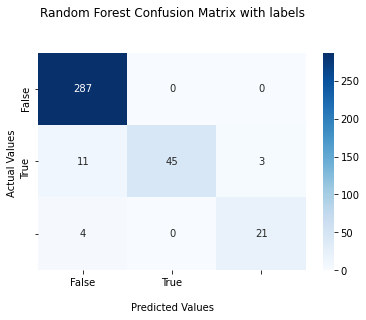

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       287
           1       1.00      0.76      0.87        59
           2       0.88      0.84      0.86        25

    accuracy                           0.95       371
   macro avg       0.94      0.87      0.90       371
weighted avg       0.95      0.95      0.95       371



In [219]:
grid_predictions = gridRF.predict(X_test_multi)

cf_matrix = confusion_matrix(y_test_multi,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Random Forest Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test_multi,grid_predictions))

In [220]:
grid_predictions = gridRF.predict(X_test_multi)


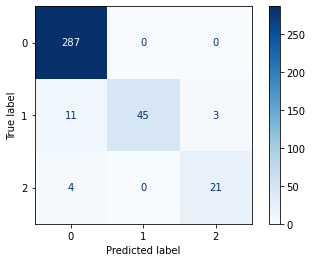

In [221]:
cm = confusion_matrix(y_test,grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_numbers)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [134]:
balanced_accuracy_score(y_test_multi, grid_predictions)

0.8845197740112994

### 3.4 AdaBoost

In [135]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
#We use these labels:
# reshape the y for training with the splitted dataset
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'baseline', 'label'] = 0
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'Generalized_Motor_Tonic_Clonic', 'label'] = 1
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'Focal_Motor', 'label'] = 2

In [137]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi  = train_test_split(x_00172_multi, y_00172_multi, test_size=0.3, random_state=22, stratify = y_00172_multi) # train_test_split of X and Y with test size 30%

In [138]:
#Grid Search

In [139]:
param_grid = {"n_estimators": [10, 25, 50, 100, 150], "learning_rate": [0.5, 0.6, 0.7, 0.8, 1.0, 1.2, 1.5],"algorithm":  ["SAMME", "SAMME.R"]}

In [140]:
gridADB = GridSearchCV(AdaBoostClassifier(),param_grid,refit=True,verbose=2)

In [147]:
y_train_multi

1019    1
589     0
664     0
698     0
416     0
       ..
1183    2
114     0
747     0
1163    2
1221    2
Name: label, Length: 865, dtype: object

In [148]:
y_train = y_train_multi.astype('int')

In [149]:
ini = time.time()
gridADB.fit(X_train_multi,y_train)
fim = time.time()

print(gridADB.best_estimator_)
print(gridADB.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=0.5, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=0.5, n_

[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, learning_rate=1.0, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME, le

[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=0.6, n_estimators=50; total time=   0.3s
[CV]

[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=10; total time=   0.0s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=25; total time=   0.1s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=50; total time=   0.3s
[CV] END algorithm=SAMME.R, learning_rate=1.2, n_estimators=50; total time=   0.3s
[CV]

In [153]:
y_test_multi = y_test_multi.to_numpy(dtype = 'int')

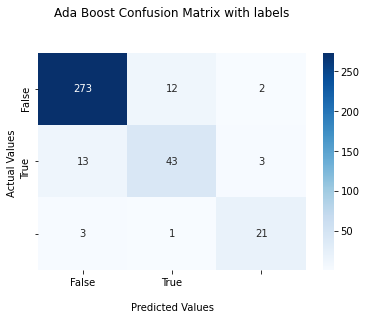

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       287
           1       0.77      0.73      0.75        59
           2       0.81      0.84      0.82        25

    accuracy                           0.91       371
   macro avg       0.84      0.84      0.84       371
weighted avg       0.91      0.91      0.91       371



In [154]:
grid_predictions = gridADB.predict(X_test_multi)

cf_matrix = confusion_matrix(y_test_multi,grid_predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Ada Boost Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test_multi,grid_predictions)) 

In [199]:
grid_predictions = gridADB.predict(X_test_multi)

In [201]:
y_test = y_test_multi.to_numpy(dtype=int)

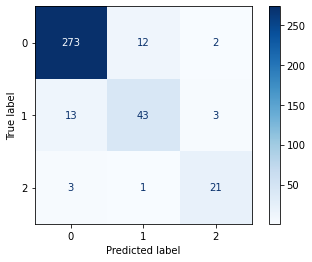

In [202]:
cm = confusion_matrix(y_test,grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_numbers)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [155]:
balanced_accuracy_score(y_test_multi, grid_predictions)

0.8400110238390518

### 3.5 KNN

In [156]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [157]:
#We use these labels:
# reshape the y for training with the splitted dataset
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'baseline', 'label'] = 0
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'Generalized_Motor_Tonic_Clonic', 'label'] = 1
#df_final_multiclass_00172.loc[df_final_multiclass_00172['label'] == 'Focal_Motor', 'label'] = 2

In [158]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi  = train_test_split(x_00172_multi, y_00172_multi, test_size=0.3, random_state=22, stratify = y_00172_multi) # train_test_split of X and Y with test size 30%

In [159]:
scaler = StandardScaler()
X_train_multi = scaler.fit_transform(X_train_multi)
X_test_multi = scaler.transform(X_test_multi)

In [160]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_train_minmax = MinMaxScaler.fit_transform(X_train_multi)
X_test_minmax = MinMaxScaler.fit_transform(X_test_multi)


In [161]:
y_train = y_train_multi.astype('int')

In [162]:
#Grid Search

In [163]:
param_grid = {"n_neighbors": [3, 5, 7, 9],"weights": ["uniform", "distance"],"algorithm": ["auto", "ball_tree", "kd_tree", "brute"],"p":[1,2]}

In [164]:
gridKNN = GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=2)

In [174]:
ini = time.time()
gridKNN.fit(X_train_multi,y_train)
fim = time.time()

print(gridKNN.best_estimator_)
print(gridKNN.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=

[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2,

[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total 

[CV] END algorithm=brute, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=brute, n_neighbors=9, p=2, weights=distance; total time=   0.0s
KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Time:  6.39831280708313


In [175]:
grid_predictions = gridKNN.predict(X_test_multi)


In [167]:
y_test = y_test_multi.to_numpy(dtype=int)

In [168]:
class_numbers = [0,1,2] 

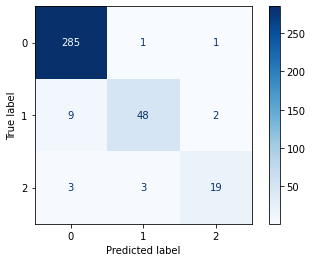

In [176]:
cm = confusion_matrix(y_test,grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_numbers)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [177]:
balanced_accuracy_score(y_test, grid_predictions)

0.8555302269729719

### 3.6 LDA

In [178]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [179]:
X_train_multi, X_test_multi, y_train_multi, y_test_multi  = train_test_split(x_00172_multi, y_00172_multi, test_size=0.3, random_state=22, stratify = y_00172_multi) # train_test_split of X and Y with test size 30%

In [180]:
#Grid

In [181]:
param_grid = {"solver": ["svd","sqr","eigen"], "shrinkage": ["auto",1,0.5,0.1,0.05,0.01,0.005,0.001]}

In [182]:
gridLDA = GridSearchCV(LDA(),param_grid,refit=True,verbose=2)

In [184]:
y_train = y_train_multi.astype('int')

In [185]:
ini = time.time()
gridLDA.fit(X_train_multi,y_train)
fim = time.time()

print(gridLDA.best_estimator_)
print(gridLDA.best_params_)
print ("Time: ", fim-ini) # result = 1.0591025352478027

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=svd; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .........................shrinkage=auto, solver=sqr; total time=   0.0s
[CV] END .......................shrinkage=auto, solver=eigen; total time=   0.0s
[CV] END .......................shrinkage=auto,

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 562, in fit
    raise ValueError("unknown solver {} (valid solvers are 'svd', "
ValueError: unknown solver sqr (valid solvers are 'svd', 'lsqr', and 'eigen').

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call l

[CV] END ............................shrinkage=1, solver=sqr; total time=   0.0s
[CV] END ..........................shrinkage=1, solver=eigen; total time=   0.0s
[CV] END ..........................shrinkage=1, solver=eigen; total time=   0.0s
[CV] END ..........................shrinkage=1, solver=eigen; total time=   0.0s
[CV] END ..........................shrinkage=1, solver=eigen; total time=   0.0s
[CV] END ..........................shrinkage=1, solver=eigen; total time=   0.0s
[CV] END ..........................shrinkage=0.5, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.5, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.5, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.5, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.5, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.5, solver=sqr; total time=   0.0s
[CV] END ...................

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=svd; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=sqr; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=sqr; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=sqr; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=sqr; total time=   0.0s
[CV] END ..........................shrinkage=0.1, solver=sqr; total time=   0.0s
[CV] END ........................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV] END ........................shrinkage=0.1, solver=eigen; total time=   0.0s
[CV] END ...................

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

[CV] END ......................shrinkage=0.005, solver=eigen; total time=   0.0s
[CV] END ......................shrinkage=0.005, solver=eigen; total time=   0.0s
[CV] END ......................shrinkage=0.005, solver=eigen; total time=   0.0s
[CV] END ......................shrinkage=0.005, solver=eigen; total time=   0.0s
[CV] END ........................shrinkage=0.001, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.001, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.001, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.001, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.001, solver=svd; total time=   0.0s
[CV] END ........................shrinkage=0.001, solver=sqr; total time=   0.0s
[CV] END ........................shrinkage=0.001, solver=sqr; total time=   0.0s
[CV] END ........................shrinkage=0.001, solver=sqr; total time=   0.0s
[CV] END ...................

C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 547, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Carolina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Carolina\anaconda3\lib

In [186]:
grid_predictions = gridLDA.predict(X_test_multi)

In [187]:
y_test = y_test_multi.to_numpy(dtype=int)

In [188]:
class_numbers = [0,1,2] 

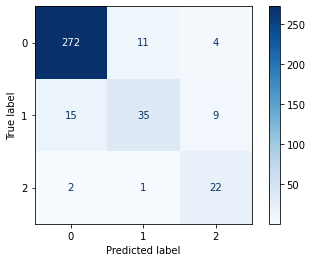

In [189]:
cm = confusion_matrix(y_test,grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_numbers)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [190]:
balanced_accuracy_score(y_test, grid_predictions)

0.8069851768735604

### 3.7 Decision Tree

In [191]:
param_grid = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"],"max_features": ["auto", "sqrt", "log2"], "class_weight": ["balanced"]}

In [192]:
gridDT = GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=2)

In [193]:
ini = time.time()
gridDT.fit(X_train_multi,y_train) #y_train = y_train_multi.astype('int')
fim = time.time()

print(gridDT.best_estimator_)
print(gridDT.best_params_)
print ("Time: ", fim-ini)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=best; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV] END class_weight=balanced, criterion=gini, max_features=auto, splitter=random; total time=   0.0s
[CV] END class_weight=

In [195]:
grid_predictions = gridDT.predict(X_test_multi)

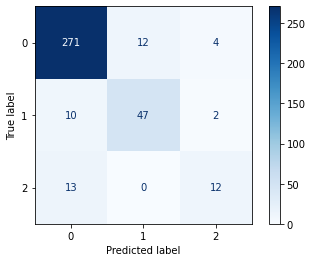

In [196]:
#y_test = y_test_multi.to_numpy(dtype=int)
#class_numbers = [0,1,2] 
cm = confusion_matrix(y_test,grid_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = class_numbers)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [197]:
balanced_accuracy_score(y_test, grid_predictions)

0.7402870135238883